In [1]:
__author__ = 'Knut Olsen <knut.olsen@noirlab.edu' # single string; emails in <>
__version__ = '20210107' # yyyymmdd; version datestamp of this notebook
__datasets__ = ['delve']  # datasets used in this notebook; for available datasets, see cell "Available datasets in Data Lab" further below
__keywords__ = [''], # keywords relevant to this notebook, e.g. ['science case','dwarf galaxies'] Use only keywords from the master list: https://github.com/noaodatalab/notebooks-latest/blob/master/internal/keywords.txt

# Accessing the DELVE DR1 catalog
*Knut Olsen* and the DELVE Team

### Table of contents
* [Summary](#summary)
* [Disclaimer & Attribution](#attribution)
* [Imports & setup](#import)
* [Accessing the database](#database)
* [Resources and references](#resources)

<a class="anchor" id="summary"></a>

# Summary
This is a brief intro to using the DELVE DR1 catalog through Data Lab.

<a class="anchor" id="attribution"></a>
# Disclaimer & attribution
If you use this notebook for your published science, please acknowledge the following:

* Data Lab concept paper: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, http://dx.doi.org/10.1117/12.2057445

* Data Lab disclaimer: http://datalab.noao.edu/disclaimers.php

<a class="anchor" id="import"></a>
# Imports and setup

In [2]:
# std lib
from getpass import getpass
import os
import time

# 3rd party # remove imports that are not needed
import numpy as np
import pylab as plt
import matplotlib
import healpy as hp
%matplotlib inline

# Data Lab
from dl import authClient as ac, queryClient as qc, storeClient as sc
from dl.helpers.utils import convert

<a class="anchor" id="database"></a>
# Accessing the database

First check that you're logged in.  If not, use the commented code to log in to the server.  Your token is stored on the server, so you will remain logged in unless you explicitly log out.

In [3]:
ac.whoAmI()
# token = ac.login(input("Enter user name: (+ENTER) "),getpass("Enter password: (+ENTER) "))

'knutago'

### List the columns
You can use the queryClient.schema() method to list the column names of the DELVE object table.

In [4]:
# schema and table names
wide_schema = 'delve_dr1'
wide_object = 'objects'

In [5]:
print(qc.schema(wide_schema+'.'+wide_object))


Schema: delve_dr1
 Table: objects

     Column Name   Description
     -----------   -----------
 quick_object_id   Unique identifier for each object
              ra   Right ascension derived from the median position of each d
                   etection
             dec   Declination derived from the median position of each detection
         hpx2048   NSIDE 2048 HEALPix index for each object
       mag_psf_g   g-band PSF magnitude (see SExtractor manual for details)
       mag_psf_r   r-band PSF magnitude (see SExtractor manual for details)
       mag_psf_i   i-band PSF magnitude (see SExtractor manual for details)
       mag_psf_z   z-band PSF magnitude (see SExtractor manual for details)
    magerr_psf_g   g-band PSF magnitude error (see SExtractor manual for details)
    magerr_psf_r   r-band PSF magnitude error (see SExtractor manual for details)
    magerr_psf_i   i-band PSF magnitude error (see SExtractor manual for details)
    magerr_psf_z   z-band PSF magnitude error (see 

### A basic query
We'll make a basic query, and return the output as a Pandas dataframe.  You can write your query as SQL (Postgres).

In [6]:
sql = '''SELECT * FROM {} LIMIT 10'''.format(wide_schema+'.'+wide_object)

print(sql)
df = qc.query(sql=sql,fmt='pandas')

SELECT * FROM delve_dr1.objects LIMIT 10


In [7]:
df

,quick_object_id,ra,dec,hpx2048,mag_psf_g,mag_psf_r,mag_psf_i,mag_psf_z,magerr_psf_g,magerr_psf_r,...,flags_z,wavg_flags_g,wavg_flags_r,wavg_flags_i,wavg_flags_z,ring32,extended_class_g,extended_class_r,extended_class_i,extended_class_z
0,10868700010720,134.508376,-24.673294,41129351,23.1142,21.6214,99,99,0.079807,0.025320,...,99,0,0,99,99,8687,0,0,-9,-9
1,10868700010736,134.513509,-24.673576,41129351,23.4723,22.1061,99,99,0.110219,0.037719,...,99,0,0,99,99,8687,1,0,-9,-9
2,10868700010744,134.516831,-24.671558,41129351,22.8518,21.3538,99,99,0.062209,0.020040,...,99,0,0,99,99,8687,3,3,-9,-9
3,10868700069704,134.519077,-24.671587,41129351,99.0000,23.0860,99,99,99.000000,0.089498,...,99,99,0,99,99,8687,-9,1,-9,-9
4,10868700010680,134.493656,-24.672123,41129357,22.6150,21.0365,99,99,0.053107,0.015825,...,99,0,0,99,99,8687,3,3,-9,-9
5,10868700010686,134.497499,-24.672567,41129357,18.0695,16.5063,99,99,0.002483,0.001055,...,99,0,0,99,99,8687,0,0,-9,-9
6,10868700010677,134.492943,-24.667467,41129357,22.7358,20.9373,99,99,0.059090,0.014521,...,99,0,3,99,99,8687,3,3,-9,-9
7,10868700010685,134.496162,-24.666774,41129357,19.2349,18.5671,99,99,0.004716,0.003142,...,99,0,2,99,99,8687,0,0,-9,-9
8,10868700089746,134.497381,-24.666566,41129357,99.0000,22.6591,99,99,99.000000,0.060511,...,99,99,2,99,99,8687,-9,3,-9,-9
9,10868700089663,134.499347,-24.671381,41129357,99.0000,23.2306,99,99,99.000000,0.103447,...,99,99,0,99,99,8687,-9,2,-9,-9


If your query will take longer than the max timeout of 600 seconds, you can run it asynchronously as an ADQL query.  The function below will issue the query and poll for the job to be completed.  If you don't want to wait, you could set the query running and come back later to check its status.

In [8]:
def longquery(query,fmt='pandas'):
    jobId = qc.query(adql=query, async_=True)
    print(jobId)
    status='RUNNING'
    while status != 'COMPLETED' and status != 'ERROR':
        status = qc.status(jobId=jobId)
        print("status: %s" % status)
        time.sleep(5)
    if status == 'ERROR':
        print("ERROR results....")
        response = qc.error(jobId=jobId)
    else:
        response = convert(qc.results(jobId=jobId), outfmt=fmt)
        
    return response

In [9]:
adql = '''SELECT TOP 1000 * FROM {}'''.format(wide_schema+'.'+wide_object)

In [10]:
dfa = longquery(adql,fmt='pandas')

f9iohyznxvqn3s6p
status: EXECUTING
status: COMPLETED


### Another basic query
Here we'll look for objects associated with a specific exposure number.

In [11]:
%%time
sql = '''SELECT * FROM {} WHERE expnum_g=605691'''.format(wide_schema+'.'+wide_object)
df1 = qc.query(sql=sql,fmt='pandas')

CPU times: user 2.41 s, sys: 653 ms, total: 3.06 s
Wall time: 16.7 s


### A cone search
Data Lab uses Q3C indices to speed up cone search queries.  Here's an example:

In [12]:
ra,dec = df1['ra'][0],df1['dec'][0]

In [13]:
sql = '''SELECT ra,dec,mag_auto_g,mag_auto_i FROM {2} where Q3C_RADIAL_QUERY(ra,dec,{0},{1},1.2)'''.format(ra,dec,wide_schema+'.'+wide_object)
print(sql)

SELECT ra,dec,mag_auto_g,mag_auto_i FROM delve_dr1.objects where Q3C_RADIAL_QUERY(ra,dec,134.493656327938,-24.6721233239088,1.2)


In [14]:
%%time
dfr = qc.query(sql=sql,fmt='pandas')

CPU times: user 520 ms, sys: 228 ms, total: 748 ms
Wall time: 5.38 s


In [15]:
print(len(dfr))

357344


Text(0, 0.5, 'Dec')

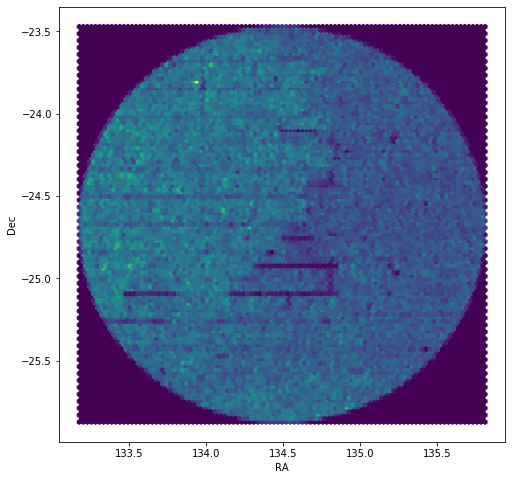

In [16]:
plt.figure(figsize=(8,8))
plt.hexbin(dfr['ra'],dfr['dec'])
plt.xlabel('RA')
plt.ylabel('Dec')

Text(0, 0.5, 'g')

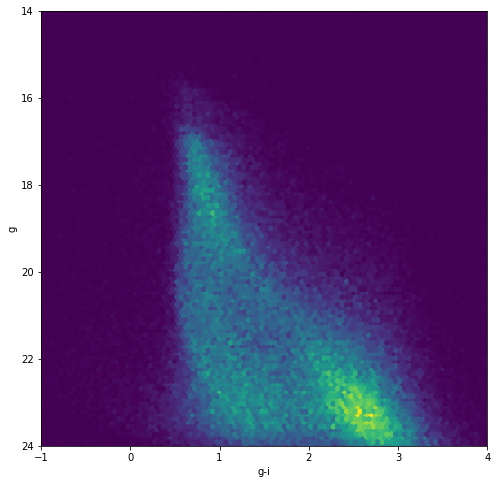

In [17]:
plt.figure(figsize=(8,8))
plt.hexbin(dfr['mag_auto_g']-dfr['mag_auto_i'],dfr['mag_auto_g'],extent=(-1,4,14,24))
plt.xlim(-1,4)
plt.ylim(24,14)
plt.xlabel('g-i')
plt.ylabel('g')

### Make a density map
Here we'll issue a query that aggregates objects by their Healpix ID on an NSIDE=256 RING scheme, and display the object density map.

In [18]:
%%time
sql = '''SELECT AVG(ra) AS ra0,AVG(dec) AS dec0,COUNT(ra) as nb,ring256 FROM {} GROUP BY ring256'''.format(wide_schema+'.'+wide_object)
df2 = qc.query(sql=sql,fmt='pandas',timeout=600)

CPU times: user 223 ms, sys: 41.9 ms, total: 265 ms
Wall time: 7min 48s


In [19]:
map = np.zeros(hp.nside2npix(256))
map[df2['ring256']] = df2['nb']

/data0/sw/anaconda3/lib/python3.7/site-packages/healpy/projaxes.py:543: UserWarning: 0.0 180.0 -180.0 180.0
  pmin / dtor, pmax / dtor, mmin / dtor, mmax / dtor
/data0/sw/anaconda3/lib/python3.7/site-packages/healpy/projaxes.py:658: UserWarning: The interval between parallels is 30 deg -0.00'.
  vdeg, varcmin
/data0/sw/anaconda3/lib/python3.7/site-packages/healpy/projaxes.py:666: UserWarning: The interval between meridians is 30 deg -0.00'.
  vdeg, varcmin
/data0/sw/anaconda3/lib/python3.7/site-packages/healpy/projector.py:846: RuntimeWarning: invalid value encountered in greater
  mask = np.asarray(x) ** 2 + np.asarray(y) ** 2 > 1.0
/data0/sw/anaconda3/lib/python3.7/site-packages/healpy/projaxes.py:425: RuntimeWarning: invalid value encountered in greater
  w = np.where(d2 > threshold)[0]


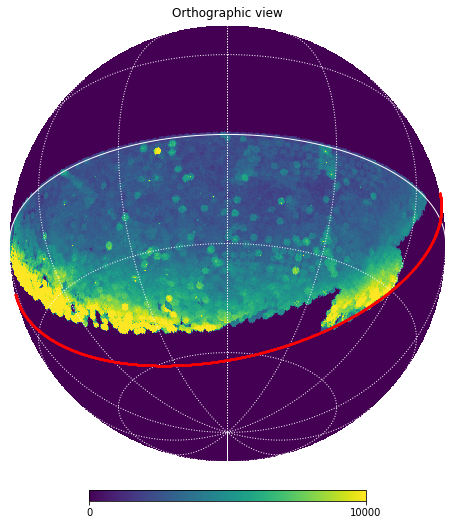

In [20]:
lon=np.arange(3600)/10
lat=np.zeros(3600)
plt.figure(figsize=(8,8))
hp.orthview(map,rot=(180,-30),min=0,max=10000,half_sky=True,fig=1,coord='C',notext=True)
hp.graticule(c='w')
foo=hp.projplot(lon,lat,'ro',coord='G',lonlat=True,markersize=1)

### Star/galaxy separation in DELVE-WIDE
The delve_dr1.objects catalog has several columns, named extended_class[g,r,i,z], that contain a morphological class based on the spread_model parameter.  Objects with extended_class = 0 or 1 are likely point sources, see the [DES DR1 paper](https://www.darkenergysurvey.org/wp-content/uploads/2018/01/DR1Release.pdf) for details.

In [21]:
# select point sources with g-r<0.75, 19.5<g<22, and gerr<0.2
delvequery = """SELECT avg(ra) as ra0,avg(dec) as dec0,hpx2048,count(hpx2048) as nb
           FROM {}
           WHERE 
           (mag_auto_g-mag_auto_r)<0.75 AND mag_auto_g>19.5 AND magerr_auto_g<0.2
           AND extended_class_g <= 1 AND extended_class_r <= 1 AND extended_class_g > -1 AND extended_class_r > -1
           GROUP BY hpx2048
        """.format(wide_schema+'.'+wide_object)
print(delvequery)

SELECT avg(ra) as ra0,avg(dec) as dec0,hpx2048,count(hpx2048) as nb
           FROM delve_dr1.objects
           WHERE 
           (mag_auto_g-mag_auto_r)<0.75 AND mag_auto_g>19.5 AND magerr_auto_g<0.2
           AND extended_class_g <= 1 AND extended_class_r <= 1 AND extended_class_g > -1 AND extended_class_r > -1
           GROUP BY hpx2048
        


In [22]:
%%time
df_ps = qc.query(sql = delvequery, fmt='pandas', timeout=600)

CPU times: user 5.88 s, sys: 2.54 s, total: 8.42 s
Wall time: 7min 39s


In [ ]:
map_ps = np.zeros(hp.nside2npix(2048))
map_ps[df_ps['hpx2048']] = df_ps['nb'] # NB: hpx2048 is on the NESTed scheme

In [ ]:
plt.figure(figsize=(10,10))
hp.orthview(map_ps,rot=(180,-30),min=0,max=10,half_sky=True,fig=1,coord='C',notext=True,nest=True)
hp.graticule(c='w')
foo=hp.projplot(lon,lat,'ro',coord='G',lonlat=True,markersize=1)

The map might look smoother if we downgrade the resolution a bit.

In [ ]:
map_ps256 = hp.ud_grade(map_ps,256,order_in='NESTED',order_out='NESTED')

In [ ]:
plt.figure(figsize=(10,10))
hp.orthview(map_ps256,rot=(180,-30),min=0,max=10,half_sky=True,fig=1,coord='C',notext=True,nest=True)
hp.graticule(c='w')
foo=hp.projplot(lon,lat,'ro',coord='G',lonlat=True,markersize=1)

### More info
Have a look at the HowTos and Science Examples folders in the notebooks directory for other things you might want to learn how to do.

<a class="anchor" id="resources"></a>
# Resources and references
